In [2]:
import pymysql

connector = pymysql.connect(user='dev', password='ax2',host='127.0.0.1',port=3307,db='pythonexam')
cursor = connector.cursor()

query = ('SELECT country, total_cases_1mio from corona20200515 WHERE LENGTH(total_cases) > 6 and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s and not country = %s')
where_not = "North America", "Asia", "South America", "Europe", "World", "Total:", "Africa", "Oceania", "South Africa"
cursor.execute(query, where_not)

countries = []
total_cases_1mio = [] 
total = []
for country, totalcases in cursor:
    countries.append(country)
    total = totalcases.replace(',','')
    total_int = int(total)
    total_cases_1mio.append(total_int)
    #print(total_cases_1mio)
    
cursor.close()
connector.close()


OperationalError: (2003, "Can't connect to MySQL server on '127.0.0.1' ([WinError 10061] No connection could be made because the target machine actively refused it)")

In [9]:
import pandas as pd

df = pd.DataFrame({'Cases pr. 1mio': total_cases_1mio},countries)
df

,Cases pr. 1mio
USA,4407
Spain,5868
Russia,1801
UK,3437
Italy,3689
Brazil,957
France,2741
Germany,2089
Turkey,1719
Iran,1366


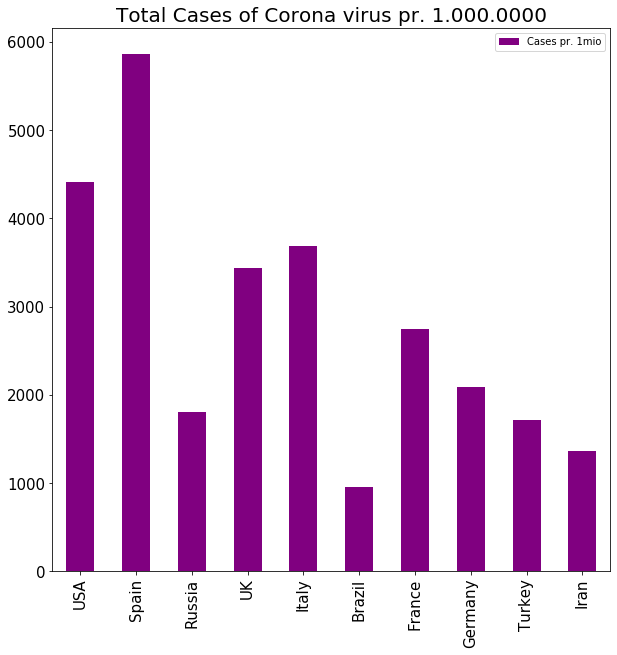

In [29]:
import matplotlib.pyplot as plt

df.plot.bar(figsize=(10,10), color='purple')

plt.title('Total Cases of Corona virus pr. 1.000.0000', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()
#plt.savefig('1mio_cases_2020-05-15.jpg')